In [ ]:
#Sentiment Analysis Feedback data of Interim File B 

In [2]:
#import sentiment_data file
import pandas as pd

dfd = pd.read_csv('sentiment_data.csv')
dfd.head()

,LeadName,FundType,QuestionNumber,FeedbackText,TextLanguage,SentimentScore
0,BC,EF,5,The project required additional human resource...,en,0.4215
1,BC,EF,6,The first round was mainly focused on building...,en,0.8720
2,BC,EF,7,"With increased costs of living, especially hou...",en,0.3892
3,BC,EF,8,We are proud of what has been accomplished wit...,en,0.9246
4,FBC,EF,5,During the first round of EFSF funding (2020) ...,en,0.9042


In [3]:
df.shape

(31, 6)

In [4]:
df.columns

Index(['LeadName', 'FundType', 'QuestionNumber', 'FeedbackText',
       'TextLanguage', 'SentimentScore'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LeadName        31 non-null     object 
 1   FundType        31 non-null     object 
 2   QuestionNumber  31 non-null     int64  
 3   FeedbackText    31 non-null     object 
 4   TextLanguage    31 non-null     object 
 5   SentimentScore  31 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.6+ KB


In [6]:
dfn = pd.DataFrame().assign(text=df['FeedbackText'])

In [7]:
dfn.isna().sum()

text    0
dtype: int64

In [ ]:
import re
import string

In [ ]:
#Processing text for tokenization
def clean_text(text):    
    text_nonum = re.sub(r'\d+', '', text)
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

cleaner=[]
for i in range(len(dfn)):
  cleaner.append(clean_text(dfn['text'][i]))
dfn['cleaned_text']=cleaner


In [ ]:
dfn['cleaned_text'].str.strip()
dfn.head()

,text,cleaned_text
0,The project required additional human resource...,the project required additional human resource...
1,The first round was mainly focused on building...,the first round was mainly focused on building...
2,"With increased costs of living, especially hou...",with increased costs of living especially hous...
3,We are proud of what has been accomplished wit...,we are proud of what has been accomplished wit...
4,During the first round of EFSF funding (2020) ...,during the first round of efsf funding allocat...


In [ ]:
import numpy as np

dfn['cleaned_text'].replace('', np.nan, inplace=True)

In [ ]:
#dropping null rows from cleaned_text
dfn.dropna(subset=['cleaned_text'], inplace=True)
dfn.head()

,text,cleaned_text
0,The project required additional human resource...,the project required additional human resource...
1,The first round was mainly focused on building...,the first round was mainly focused on building...
2,"With increased costs of living, especially hou...",with increased costs of living especially hous...
3,We are proud of what has been accomplished wit...,we are proud of what has been accomplished wit...
4,During the first round of EFSF funding (2020) ...,during the first round of efsf funding allocat...


In [ ]:
# after filtering have resetting the index of the dataframe
dfn.reset_index(drop=True, inplace=True)

In [ ]:
dfn.head(2)

,text,cleaned_text
0,The project required additional human resource...,the project required additional human resource...
1,The first round was mainly focused on building...,the first round was mainly focused on building...


In [ ]:
#nlp package for sentiment analysis

In [ ]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# install needed package - Language detection library ported from Google's language-detection
! pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from langdetect import detect

In [ ]:
# add new column in dataframe with language detected
dfn['text_language'] = [detect(this_text) for this_text in dfn.cleaned_text]

In [ ]:
dfn[['text', 'cleaned_text', 'text_language']].head(2)

,text,cleaned_text,text_language
0,The project required additional human resource...,the project required additional human resource...,en
1,The first round was mainly focused on building...,the first round was mainly focused on building...,en


In [ ]:
dfn = dfn[dfn['text_language']=='en']

In [ ]:
dfn.reset_index(drop=True, inplace=True)
dfn.shape

(24, 3)

In [ ]:
# Vader Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# define sentiment model
sid = SentimentIntensityAnalyzer()

In [ ]:
#user defined vader sentiment polarity function
def vadersenti(x):    
    return sid.polarity_scores(x) 

In [ ]:
dfn['vader_sentiscore'] = dfn['cleaned_text'].apply(vadersenti)

In [ ]:
dfn.head(2)

,text,cleaned_text,text_language,vader_sentiscore
0,The project required additional human resource...,the project required additional human resource...,en,"{'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'comp..."
1,The first round was mainly focused on building...,the first round was mainly focused on building...,en,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp..."


In [ ]:
# getting compound score for texts
def cmpndvadersenti(x):    
    return sid.polarity_scores(x)['compound'] 

In [ ]:
dfn['compound_vader_sentiscore'] = dfn['cleaned_text'].apply(cmpndvadersenti)
dfn.head(2)

,text,cleaned_text,text_language,vader_sentiscore,compound_vader_sentiscore
0,The project required additional human resource...,the project required additional human resource...,en,"{'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'comp...",0.4215
1,The first round was mainly focused on building...,the first round was mainly focused on building...,en,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.8720


In [ ]:
#visualizing tweets using heatmap
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [ ]:
data=dfn.cleaned_text[0]
data

'the project required additional human resources at first we were still adapting our technological infrastructure to the type of work required by the project so we experienced some delays but then our new database helped us to closely monitor results and report creating the necessary partnerships to implementing a new national food procurement model took us more time then expected'

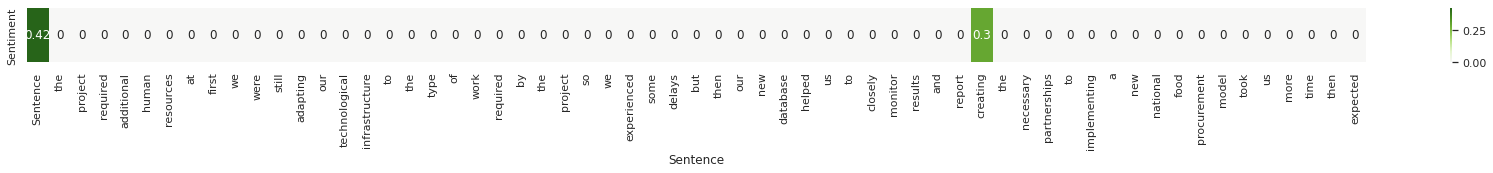

In [ ]:
visualise_sentiments({
    "Sentence":["Sentence"] + data.split(),
    "Sentiment":[sid.polarity_scores(data)["compound"]] + [sid.polarity_scores(word)["compound"] for word in (data.split())]
})

In [ ]:
#Merging dataframes

In [ ]:
#keeping only english
dft=df[0:24]
dft.drop(['Text'], axis=1,inplace=True)
dfn.head(2)

<ipython-input-108-aa02e0bd7b18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft.drop(['Text'], axis=1,inplace=True)


,text,cleaned_text,text_language,vader_sentiscore,compound_vader_sentiscore
0,The project required additional human resource...,the project required additional human resource...,en,"{'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'comp...",0.4215
1,The first round was mainly focused on building...,the first round was mainly focused on building...,en,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.8720


In [ ]:
dfn=dfn[['text','text_language','compound_vader_sentiscore']]
dfn.head(2)

,text,text_language,compound_vader_sentiscore
0,The project required additional human resource...,en,0.4215
1,The first round was mainly focused on building...,en,0.8720


In [ ]:
#French Analysis using Vader's french package 

In [ ]:
!pip install vaderSentiment-fr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dff = pd.DataFrame().assign(text=df['Text'])

In [ ]:
# add new column in dataframe with language detected
dff['text_language'] = [detect(this_text) for this_text in dff.text]
dff = dff[dff['text_language']=='fr']
dff.reset_index(drop=True, inplace=True)
dff.head(2)

,text,text_language
0,Volume d'aliments en kilogrammes (si autre uni...,fr
1,Chaque repas préparé est distribué à travers l...,fr


In [ ]:
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer
# define model
SIA = SentimentIntensityAnalyzer()

In [ ]:
# getting compound score for texts
def fcmpndvadersenti(x):    
    return SIA.polarity_scores(x)['compound'] 

In [ ]:
dff['compound_vader_sentiscore'] = dff['text'].apply(fcmpndvadersenti)
dff.head(2)

,text,text_language,compound_vader_sentiscore
0,Volume d'aliments en kilogrammes (si autre uni...,fr,0.000
1,Chaque repas préparé est distribué à travers l...,fr,0.885


In [ ]:
dff

,text,text_language,compound_vader_sentiscore
0,Volume d'aliments en kilogrammes (si autre uni...,fr,0.0000
1,Chaque repas préparé est distribué à travers l...,fr,0.8850
2,Communautés isolées.Communautés autochtones.,fr,0.0000
3,"Grâce au Fond d'urgence du Fédéral, nous avons...",fr,0.9456
4,"Au lancement de l'initiative, nous avons obser...",fr,0.8135
5,Dans les opérations régulières de La Tablée de...,fr,0.6854
6,L'approche et le développement de relations av...,fr,0.7269


In [ ]:
#Merging all dataframes
dft=df
dft.drop(['Text'], axis=1,inplace=True)
dft.head(2)

,Lead,FundType,Question
0,BC,EF,5
1,BC,EF,6


In [ ]:
dfr=pd.concat([dfn, dff], axis=0)
dfr.reset_index(inplace=True)
dfr.tail(2)

,index,text,text_language,compound_vader_sentiscore
29,5,Dans les opérations régulières de La Tablée de...,fr,0.6854
30,6,L'approche et le développement de relations av...,fr,0.7269


In [ ]:
dfop=pd.concat([dft, dfr], axis=1)
dfop.head(2)

,Lead,FundType,Question,index,text,text_language,compound_vader_sentiscore
0,BC,EF,5,0,The project required additional human resource...,en,0.4215
1,BC,EF,6,1,The first round was mainly focused on building...,en,0.8720
